In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import bilby
import corner 
import seaborn as sns
import pandas as pd
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import matplotlib as mpl
from matplotlib.patches import Rectangle
from matplotlib.legend_handler import HandlerPatch
import matplotlib.colors as mcolors

%matplotlib inline

/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/bilby/gw/source.py:2: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal


In [2]:
# Set rcParams first
plt.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': 20,
    'axes.titlesize': 32,
    'font.size': 24,
    'legend.fontsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
    'lines.linewidth': 3,
    'patch.force_edgecolor': True,
    'axes.unicode_minus': False
})

/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignor

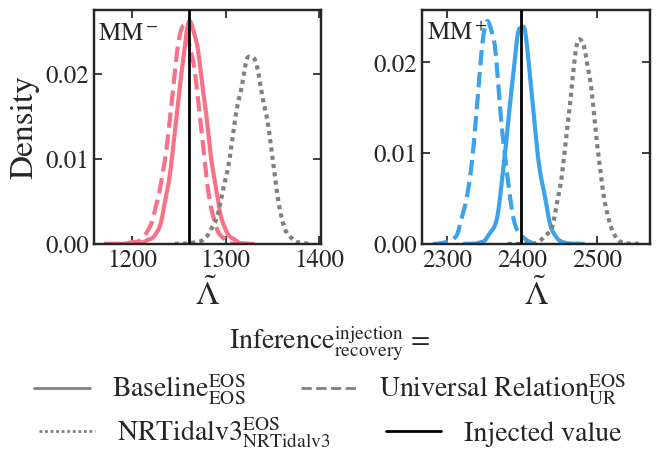

In [ ]:
# --- Style ---
sns.set(style='white')
fs = 24
mpl.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': fs,
    'axes.titlesize': 32,
    'font.size': fs-4,
    'legend.fontsize': fs-4,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'lines.linewidth': 3,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})
mpl.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral"
})
alpha_val = 1
c = sns.husl_palette(3)

# --- Setup ---
rundir = f'/work/williams5/testing-urs/bilby/runs/extreme-cases'
EOS = ['soft', 'stiff']

# --- Figure ---
fig, axs = plt.subplots(1, 2, figsize=(7, 3.3), sharex=False)  # single column

# --- Legends ---
top_legend_elements = [
    Line2D([0], [0], color='grey', lw=2, linestyle='-', label=r'Baseline$^{\mathrm{EOS}}_{\mathrm{EOS}}$'),
    Line2D([0], [0], color='grey', lw=2, linestyle='--', label=r'Universal Relation$^{\mathrm{EOS}}_{\mathrm{UR}}$')
]
bottom_legend_elements = [
    Line2D([0], [0], color='grey', lw=2, linestyle=(0, (1, 1)), label=r'NRTidalv3$^{\mathrm{EOS}}_{\mathrm{NRTidalv3}}$'),
    Line2D([0], [0], color='black', lw=2, linestyle='-', label='Injected value'),
]
colours = [c[0],c[2]]
# --- Loop over EOS ---
for i, eos in enumerate(EOS):
    ax = axs[i]

    # Load results
    result_std = bilby.result.read_in_result(
        filename=f'{rundir}/samplefUR/{eos}/EOS_EOS/outdir/ex_EOS_EOS_result.json'
    )
    result_ur = bilby.result.read_in_result(
        filename=f'{rundir}/samplefUR/{eos}/EOS_UR/outdir/ex_EOS_UR_result.json'
    )

    result_nrtidal = bilby.result.read_in_result(
        filename=f'{rundir}/samplefUR/{eos}/NRTidalv3/outdir/ex_NRTidalv3_result.json'
    )

    # KDE plots
    sns.kdeplot(result_std.posterior['lambda_tilde'], ax=ax,
                color=colours[i], linewidth=3, fill=False, alpha=alpha_val)
    sns.kdeplot(result_ur.posterior['lambda_tilde'], ax=ax,
                color=colours[i], linewidth=3, fill=False, alpha=alpha_val, linestyle = '--')
    sns.kdeplot(result_nrtidal.posterior['lambda_tilde'], ax=ax,
                color='grey', linewidth=3, fill=False, alpha=alpha_val, linestyle=(0, (1, 1)))

    # Injected value
    ax.axvline(result_ur.injection_parameters['lambda_tilde'], linewidth=2, color='black', zorder=10)

    # Labels
    ax.set_xlabel(r'$\tilde{\Lambda}$')
    ax.set_ylabel("Density")
    ax.tick_params(axis='both', labelsize=18)

    # Panel label
    panel_label = r'MM$^-$' if eos == 'soft' else r'MM$^+$'
    ax.text(0.02, 0.95, panel_label, transform=ax.transAxes, ha='left', va='top', fontsize=18)

    # Spines
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, bottom=True, left=True)

    # Remove individual legend
    ax.legend().remove()
    if i ==1:
        ax.set_ylabel("")

# --- Text above legend ---
fig.text(
    0.5, -0.15,
    r"Inference$^{\mathrm{injection}}_{\mathrm{recovery}}$ =",
    ha='center', va='center'
)

# --- Legends ---
fig.legend(handles=top_legend_elements, loc='lower center', ncol=2, frameon=False,
           bbox_to_anchor=(0.5, -0.42))
fig.legend(handles=bottom_legend_elements, loc='lower center', ncol=2, frameon=False,
           bbox_to_anchor=(0.5, -0.55))
#fig.suptitle(r"Fundamental Mode Frequency", fontsize=22, y=0.95, x=0.6)
# --- Layout ---
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.subplots_adjust(hspace=0.35, bottom=0.15)
plt.savefig('extreme_cases_fmode.pdf', dpi=600, bbox_inches='tight')
plt.show()


/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd

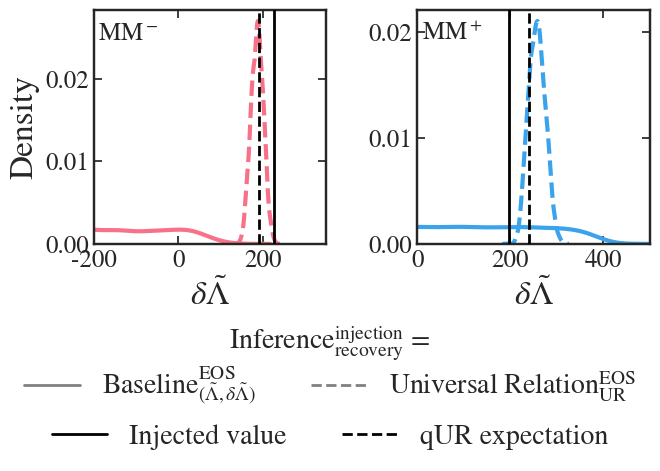

In [ ]:
# --- Style ---
sns.set(style='white')
fs = 24
mpl.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': fs,
    'axes.titlesize': 32,
    'font.size': fs-4,
    'legend.fontsize': fs-4,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'lines.linewidth': 3,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})

mpl.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral"
})
alpha_val = 1
c = sns.husl_palette(3)

# --- Setup ---
rundir = f'/work/williams5/testing-urs/bilby/runs/extreme-cases'
EOS = ['soft', 'stiff']

# --- Figure ---
fig, axs = plt.subplots(1, 2, figsize=(7, 3.3), sharey=False)  # single column

# --- Legends ---
top_legend_elements = [
    Line2D([0], [0], color='grey', lw=2, linestyle='-', label=r'Baseline$^{\mathrm{EOS}}_{(\tilde{\Lambda}, \delta\tilde{\Lambda})}$'),
    Line2D([0], [0], color='grey', lw=2, linestyle='--', label=r'Universal Relation$^{\mathrm{EOS}}_{\mathrm{UR}}$'),
]
bottom_legend_elements = [
    Line2D([0], [0], color='black', lw=2, linestyle='-', label=r'Injected value'),
    Line2D([0], [0], color='black', lw=2, linestyle='--', label=r'qUR expectation')
]
colours = [c[0],c[2]]
# --- Loop over EOS ---
for i, eos in enumerate(EOS):
    ax = axs[i]

    # Load results
    result_std = bilby.result.read_in_result(
        filename=f'{rundir}/sampleLaUR/{eos}/standard/outdir/standard_result.json'
    )
    result_ur = bilby.result.read_in_result(
        filename=f'{rundir}/sampleLaUR/{eos}/UR/outdir/sampleLaUR_result.json'
    )

    # KDE plots
    sns.kdeplot(result_std.posterior['delta_lambda_tilde'], ax=ax,
                color=colours[i], linewidth=3, fill=False, alpha=alpha_val)
    sns.kdeplot(result_ur.posterior['delta_lambda_tilde'], ax=ax,
                color=colours[i], linewidth=3, fill=False, alpha=alpha_val, linestyle='--')

    # Injected values
    inj = result_ur.injection_parameters
    lambda_sym = bilby.gw.conversion.lambda_1_lambda_2_to_lambda_symmetric(inj['lambda_1'], inj['lambda_2'])
    lambda_antisym = bilby.gw.conversion.binary_love_fit_lambda_symmetric_mass_ratio_to_lambda_antisymmetric(
        lambda_sym, inj['mass_ratio']
    )
    l1_ur, l2_ur = bilby.gw.conversion.lambda_symmetric_lambda_antisymmetric_to_lambda_1_lambda_2(
        lambda_sym, lambda_antisym
    )
    lambda_tilde_ur = bilby.gw.conversion.lambda_1_lambda_2_to_delta_lambda_tilde(
        l1_ur, l2_ur, inj['mass_1_source'], inj['mass_2_source']
    )

    ax.axvline(inj['delta_lambda_tilde'], linewidth=2, color='black', linestyle='-', zorder=10)
    ax.axvline(lambda_tilde_ur, linewidth=2, color='black', linestyle='--', zorder=10)

    # Labels
    ax.set_xlabel(r'$\delta\tilde{\Lambda}$')
    ax.set_ylabel("Density")
    ax.tick_params(axis='both', labelsize=18)

    # Panel label
    panel_label = r'MM$^-$' if eos == 'soft' else r'MM$^+$'
    ax.text(0.02, 0.95, panel_label, transform=ax.transAxes, ha='left', va='top', fontsize=18)

    # Spines
    for spine in ax.spines.values():
        spine.set_visible(True)
    ax.tick_params(axis='both', which='both', direction='in', top=True, right=True, bottom=True, left=True)
    
    if i ==1:
        ax.set_ylabel("")


    # Remove individual legend
    ax.legend().remove()
axs[0].set_xlim(-200,350)
axs[1].set_xlim(0,500)
# --- Text above legend ---
fig.text(
    0.5, -0.15,
    r"Inference$^{\mathrm{injection}}_{\mathrm{recovery}}$ =",
    ha='center', va='center'
)

# --- Legends ---
fig.legend(handles=top_legend_elements, loc='lower center', ncol=2, frameon=False,
           bbox_to_anchor=(0.5, -0.42))
fig.legend(handles=bottom_legend_elements, loc='lower center', ncol=2, frameon=False,
           bbox_to_anchor=(0.5, -0.55))
#fig.suptitle(r"Binary Love", fontsize=22, y=0.95, x=0.6)
# --- Layout ---
plt.tight_layout(rect=[0, 0.08, 1, 0.95])
plt.subplots_adjust(hspace=0.35, bottom=0.15)
plt.savefig('extreme_cases_La.pdf', dpi=600, bbox_inches='tight')
plt.show()


/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/williams5/miniforge3/envs/testing_URs/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignor

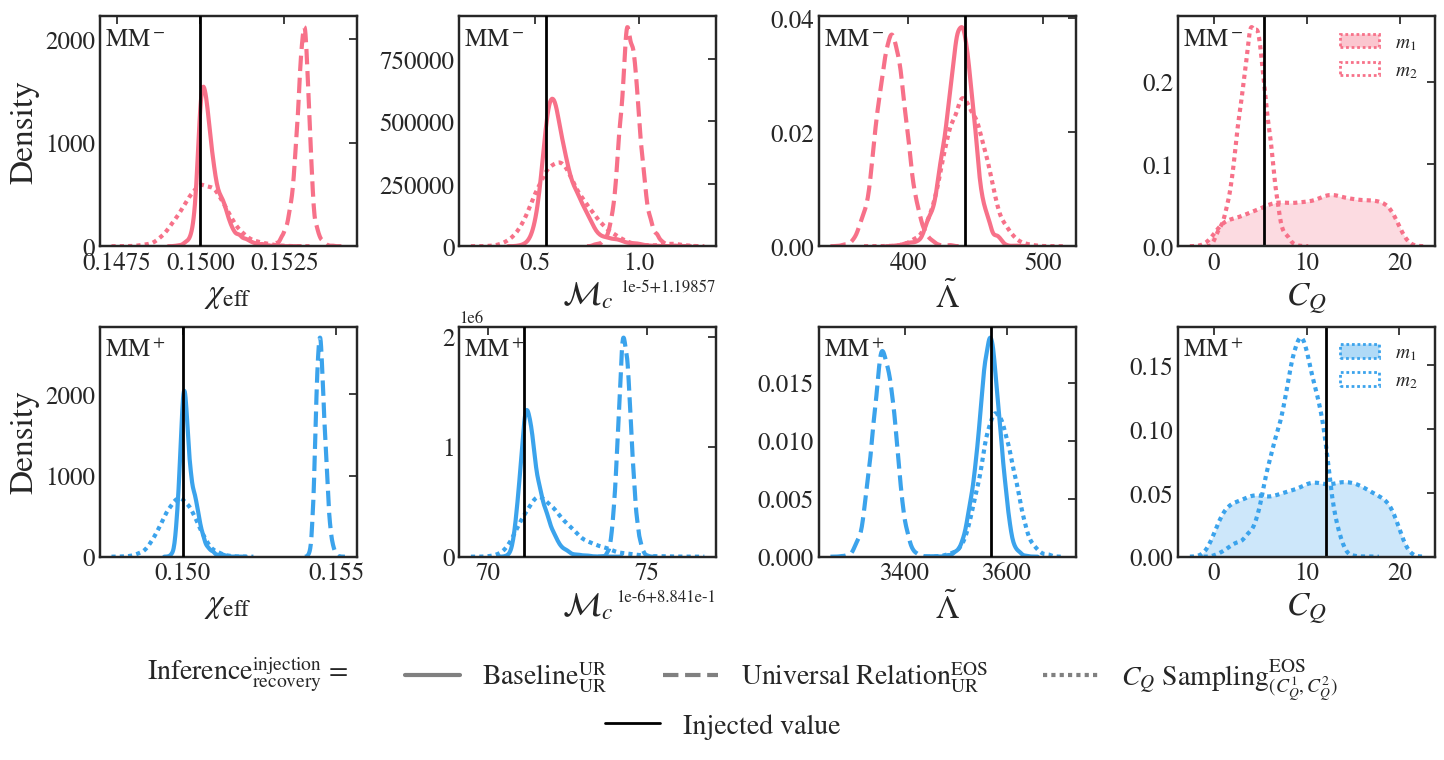

In [ ]:
sns.set_style('white')  # only sets style, not rcParams
fs = 24
mpl.rcParams.update({
    'axes.linewidth': 1.75,
    'axes.labelsize': fs,
    'axes.titlesize': 32,
    'font.size': fs-4,
    'legend.fontsize': fs-4,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,
    'lines.linewidth': 3,
    'font.family': 'serif',
    'mathtext.fontset': 'cm',
})


class HandlerPatchDotted(HandlerPatch):
    def __init__(self, dashes=(1,1), **kwargs):
        self.dashes = dashes
        super().__init__(**kwargs)

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):
        # Create rectangle with separate face and edge properties
        patch = Rectangle([xdescent, ydescent], width, height,
                          facecolor=orig_handle.get_facecolor(), 
                          edgecolor=orig_handle.get_edgecolor(),
                          linewidth=orig_handle.get_linewidth(),
                          transform=trans)
        # Apply custom dash pattern to edge
        patch.set_linestyle((0, self.dashes))
        return [patch]

# ---------------------------------------------------------------------
# Style
# ---------------------------------------------------------------------
mpl.rcParams.update({
    "text.usetex": False,
    "mathtext.fontset": "stix",
    "font.family": "STIXGeneral"
})
alpha_val = 1
c = sns.husl_palette(3)
green_color = c[1]  # a nice green hue

# ---------------------------------------------------------------------
# Setup
# ---------------------------------------------------------------------
rundir = f'/work/williams5/testing-urs/bilby/runs/extreme-cases'
EOS = ['soft', 'stiff']
params = [
    ('chi_eff', r'$\chi_{\mathrm{eff}}$'),
    ('chirp_mass', r'$\mathcal{M}_c$'),
    ('lambda_tilde', r'$\tilde{\Lambda}$'),
    ('C_Q', r'$C_Q$')  # placeholder for the C_Q column
]

n_rows = len(EOS)
n_cols = len(params)

# Create figure: 2 rows × 4 columns
fig, axs = plt.subplots(n_rows, n_cols, figsize=(14.85, 7.4))

# Legends
top_legend_elements = [
    Line2D([0], [0], color='grey', lw=3, linestyle='-', label=r'Baseline$^{\mathrm{UR}}_{\mathrm{UR}}$'),
    Line2D([0], [0], color='grey', lw=3, linestyle='--', label=r'Universal Relation$^{\mathrm{EOS}}_{\mathrm{UR}}$'),
    Line2D([0], [0], color='grey', lw=3, linestyle=(0, (1,1)), label=r'$C_Q$ Sampling$^{\mathrm{EOS}}_{(C_{Q}^1, C_{Q}^2)}$')
]

bottom_legend_elements = [
    Line2D([0], [0], color='black', lw=2, label='Injected value')
]
# ---------------------------------------------------------------------
# Preload results
# ---------------------------------------------------------------------
results = {}
for eos in EOS:
    results[eos] = {
        "sampleQ": bilby.result.read_in_result(f"{rundir}/sampleQ/{eos}/indep/outdir/sampleQ_result.json"),
        "sampleQUR": bilby.result.read_in_result(f"{rundir}/sampleQ/{eos}/UR/outdir/sampleQUR_result.json"),
        "standard": bilby.result.read_in_result(f"{rundir}/sampleQ/{eos}/standard/outdir/standard_result.json")
    }

# ---------------------------------------------------------------------
# Plot loop
# ---------------------------------------------------------------------
for row, eos in enumerate(EOS):
    for col, (param, xlabel) in enumerate(params):
        ax = axs[row, col]

        result_q = results[eos]["sampleQ"]
        result_ur = results[eos]["sampleQUR"]
        result_std = results[eos]["standard"]

        # Set row color
        row_color = c[0] if row == 0 else c[2]

        if param != 'C_Q':
            # KDE plots for normal parameters
            sns.kdeplot(result_q.posterior[param], ax=ax, fill=False, color=row_color, alpha=alpha_val, lw=3, dashes=(1, 1))
            sns.kdeplot(result_ur.posterior[param], ax=ax, fill=False, color=row_color, alpha=alpha_val, lw=3, linestyle='--')
            sns.kdeplot(result_std.posterior[param], ax=ax, fill=False, color=row_color, alpha=alpha_val, lw=3, linestyle = '-')
            # Injected value
            ax.axvline(result_ur.injection_parameters[param], linewidth=2, color='black', zorder=10)
        else:
            # C_Q column
            sns.kdeplot(result_q.posterior['dquadmod1'], ax=ax, fill=True, color=row_color, lw=0)
            sns.kdeplot(result_q.posterior['dquadmod1'], ax=ax, color=row_color, lw=3, dashes=(1, 1))
            sns.kdeplot(result_q.posterior['dquadmod2'], ax=ax, color=row_color, lw=3, dashes=(1, 1))
            #ax.axvline(result_q.injection_parameters['dquadmod1'], linewidth=2, color='black', dashes=(1, 1))
            ax.axvline(result_q.injection_parameters['dquadmod2'], linewidth=2, color='black', linestyle='-')
            # Mini legend for C_Q
            # m1: filled, dotted border
            face_with_alpha = mcolors.to_rgba(row_color, alpha=0.4)  # alpha only for fill 
            m1_patch = Rectangle((0,0),1,1, facecolor=face_with_alpha, edgecolor=row_color, linewidth=2, label=r'$m_1$')

            # m2: no fill, dotted border
            m2_patch = Rectangle((0,0),1,1, facecolor='none', edgecolor=row_color, linewidth=2,  label=r'$m_2$')
            ax.legend(handles=[m1_patch, m2_patch,],handler_map={m1_patch: HandlerPatchDotted(dashes=(1,1)),m2_patch: HandlerPatchDotted(dashes=(1,1))},loc='upper right', fontsize=14, frameon=False)

        # Labels and aesthetics
        ax.set_xlabel(xlabel)
        ax.xaxis.get_offset_text().set_fontsize(12)  # smaller than default
        ax.yaxis.get_offset_text().set_fontsize(12)  # smaller than default
        ax.tick_params(axis='both', labelsize=18)
        for spine in ax.spines.values():
            spine.set_visible(True)
        ax.tick_params(axis='both', which='both', direction='in', top=True, right=True)
        if param != 'C_Q':
            ax.legend().remove()
        if col ==0:
            ax.set_ylabel("Density")
        else:
           ax.set_ylabel("") 
# ---------------------------------------------------------------------
# Panel labels
# ---------------------------------------------------------------------
for row, eos in enumerate(EOS):
    for col, (param, _) in enumerate(params):
        label = r'MM$^-$' if eos == 'soft' else r'MM$^+$'
        axs[row, col].text(0.02, 0.95, label, transform=axs[row, col].transAxes,
                           ha='left', va='top', fontsize = 18)

# ---------------------------------------------------------------------
# Title and figure legends
# ---------------------------------------------------------------------
#fig.suptitle(r"Spin–Induced Quadrupole Moment", fontsize=22, y=0.95, x=0.5)
fig.text(0.18, -0.0075, r"Inference$^{\mathrm{injection}}_{\mathrm{recovery}}$ =",
         ha='center', va='center')

fig.legend(handles=top_legend_elements, loc='lower center', ncol=3, frameon=False,
           bbox_to_anchor=(0.6, -0.08))
fig.legend(handles=bottom_legend_elements, loc='lower center', ncol=1, frameon=False,
           bbox_to_anchor=(0.5, -0.13))

# Layout
plt.tight_layout(rect=[0, 0.08, 1, 0.93])
plt.subplots_adjust(hspace=0.35, wspace=0.4, bottom=0.15)
plt.savefig('extreme_cases_quad.pdf', dpi=600, bbox_inches='tight')
plt.show()
